# <p style="background-color:#34495E; color:lightgray; font-size:110%; text-align:center; border-radius:20px 20px;width:950px;height:50px;line-height:50px;border-style:round;">Python DB API</p>

DB-API is an acronym for DataBase Application Programming Interface and a library that lets Python connect to the database server.

## PyODBC
Pyodbc is a Python DB conformant module for ODBC databases. 

**ODBC** (Open Database Connectivity) is the primary native data access API for applications written in C and C++ for SQL Server. Other languages that can use ODBC include COBOL, Perl, PHP, and Python. ODBC is widely used in data integration scenarios.

In [165]:
# !pip install pyodbc

In [166]:
import pyodbc

In [167]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

***

## SQL SERVER CONNECTION

### SQL Server Authentication

In [168]:
def create_server_connection(driver, server, database, user, password):
    conn = None
    try: 
        conn = pyodbc.connect(DRIVER=driver, SERVER=server, DATABASE=database, UID=user, PWD=password)
        print("MS SQL Server Database connection successful!")
    except Exception as err:
        print(f"ERROR:\t'{err}'")
    return conn

In [169]:
driver = '{ODBC Driver 17 for SQL Server}'
server = 'localhost'
database = 'master'
user = 'sa'          # 'sa' means system administrator
password = '----------'   # your password

conn = create_server_connection(driver, server, database, user, password)

ERROR:	'('28000', "[28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user 'sa'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user 'sa'. (18456)")'


In [ ]:
conn.close()  # to close the sql server connection

### Windows Authentication

In [170]:
conn_string = """driver={ODBC Driver 17 for SQL Server}; 
                 server=DESKTOP-6B3FEDR; 
                 database=master; 
                 TRUSTED_CONNECTION=yes;"""
                 #TrustServerCertificate = yes; ##for cerficifate error

In [171]:
conn = pyodbc.connect(conn_string)
conn

***

## Connection Objects

**cursor :** to access the data in the database
    
**commit :** This method commits the current transaction. It allows the transactions made here to be reflected (commit) to the sql server. If you do not commit, they will not be reflected.

**connection.close :** to close the sql server connection

### Cursor process

In [172]:
crs = conn.cursor()

In [173]:
conn.autocommit = True 

In [ ]:
#conn.commit() -- for desired transactions

***

## Cursor Objects

### Create Database

In [107]:
crs.execute('CREATE DATABASE TestA')

In [174]:
def create_database(conn, create_db_query):   
    crs = conn.cursor() 
    try:
        crs.execute(create_db_query)  #prepares and executes SQL
        print("Database is Created Successfully")
    except Exception as err:
            print(f"ERROR:\t'{err}'")

In [175]:
create_db_query = 'CREATE DATABASE TestB'

In [176]:
create_database(conn, create_db_query)

Database is Created Successfully


In [177]:
crs.execute('DROP DATABASE TestB')

### Executing a query

All SQL statements are executed using the Cursor execute() function. 

In [178]:
query = 'USE TestA'

In [179]:
crs.execute(query)

In [180]:
def execute_query(conn, query):
    crs = conn.cursor()
    try:
        crs.execute(query)
        conn.commit()
        print("Query Succeessful!")
    except Exception as err:
        print(f"ERROR:\t'{err}'")

In [181]:
execute_query(conn,query)

Query Succeessful!


### Create Table

In [182]:
query = """CREATE TABLE TestTable (
                ID INT IDENTITY (1,1) NOT NULL, 
                FirstName VARCHAR(255) NOT NULL,
                LastName VARCHAR(255) NOT NULL,
                PRIMARY KEY(ID))"""

In [183]:
execute_query(conn, query)

Query Succeessful!


### Insert Values

In [184]:
crs.execute("INSERT TestTable (FirstName, LastName) VALUES ('Bob', 'Marley')")

In [185]:
# parameterized
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", 'Bruce', 'Lee')
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", ('Jerry', 'Blue'))
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", ('Katie', 'Holmes'))

In [186]:
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", 'Tom', 'Cat')
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", 'Jerry', 'Mouse')
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", 'Owen', 'William')
crs.execute("INSERT TestTable (FirstName, LastName) VALUES (?,?)", 'Stefan', 'Müller')

In [ ]:
#crs.execute("SELECT * FROM TestTable").fetchall()

### Updating and Deleting with rowcount

In [187]:
crs.execute("DELETE FROM TestTable WHERE FirstName = 'Katie'")
crs.rowcount

1

In [188]:
deleted = crs.execute("DELETE FROM TestTable WHERE FirstName = ?", 'Jerry').rowcount
print(deleted, 'row(s) deleted')

2 row(s) deleted


In [189]:
crs.execute("UPDATE TestTable SET FirstName='Natalie', LastName='Portman' WHERE ID=8")
print(crs.rowcount, 'row(s) updated')

1 row(s) updated


In [ ]:
#crs.execute("SELECT * FROM TestTable").fetchall()

***

## Cursor Functions -- Reading Data

All SQL statements are executed using the Cursor execute() function. 

If the statement returns rows, such as a select statement, you can retrieve them using the Cursor fetch functions - fetchone(), fetchall(), fetchmany(). 

If there are no rows, fetchone() will return None, whereas fetchall() and fetchmany() will both return empty lists.

#### Fetchone

In [202]:
crs.execute('SELECT FirstName, LastName FROM TestTable')

In [215]:
row = crs.fetchone()  # it returns the first record of the table
row

(8, 'Natalie', 'Portman')

In [213]:
crs.fetchone()  # it returns the next record of the table

(7, 'Owen', 'William')

The `fetchone()` function returns None when all rows have been retrieved.

In [205]:
crs.execute('select FirstName, LastName from TestTable')
row = crs.fetchone()

print('LastName:', row[1])         # access by column index (zero-based)
print('LastName:', row.LastName)   # access by name

LastName: Marley
LastName: Marley


#### Fetchmany

In [216]:
crs.execute("""SELECT ID, FirstName, LastName 
                FROM TestTable""")
rows = crs.fetchmany(3)
rows
# many rows .

[(1, 'Bob', 'Marley'), (2, 'Bruce', 'Lee'), (5, 'Tom', 'Cat')]

In [217]:
rows[0]

(1, 'Bob', 'Marley')

#### Fetchall

In [138]:
crs.execute('SELECT ID, FirstName, LastName FROM TestTable')
rows = crs.fetchall()
rows 

[(1, 'Bob', 'Marley'),
 (2, 'Bruce', 'Lee'),
 (5, 'Tom', 'Cat'),
 (7, 'Owen', 'William'),
 (8, 'Natalie', 'Portman')]

In [140]:
for row in rows:
    print(row.ID, row.FirstName, row.LastName)

1 Bob Marley
2 Bruce Lee
5 Tom Cat
7 Owen William
8 Natalie Portman


***

## Connecting Different Databases

In [142]:
crs.execute('USE SampleRetail')

In [143]:
crs.execute("SELECT * FROM product.category").fetchall()

[(1, 'Televisions & Accessories'),
 (2, 'Camera'),
 (3, 'Dryer'),
 (4, 'Computer Accessories'),
 (5, 'Speakers'),
 (6, 'mp4 player'),
 (7, 'Home Theater'),
 (8, 'Car Electronics'),
 (9, 'Digital Camera Accessories'),
 (10, 'Hi-Fi Systems'),
 (11, 'Earbud'),
 (12, 'Game'),
 (13, 'Audio & Video Accessories'),
 (14, 'Bluetooth'),
 (15, 'gps'),
 (16, 'Receivers Amplifiers')]

In [144]:
query = """SELECT  
                RIGHT(email, LEN(email)-CHARINDEX('@', email)) AS DomainType,
                COUNT(RIGHT(email, LEN(email)-CHARINDEX('@', email))) AS NumofDomains
           FROM 
                sale.customer
           GROUP BY
                RIGHT(email, LEN(email)-CHARINDEX('@', email))
           ORDER BY
                NumofDomains DESC;"""

In [145]:
crs.execute(query).fetchall()

[('hotmail.com', 251),
 ('msn.com', 251),
 ('amazon.com', 242),
 ('gmail.com', 241),
 ('outlook.com', 239),
 ('yandex.com', 228),
 ('aol.com', 217),
 ('yahoo.com', 207),
 ('aliexpress.com', 113),
 ('aliexpress.co', 7),
 ('aliexpress.c', 2),
 ('aliexpress.', 1),
 ('amazon.co', 1)]

***

## Pandas Methods

### Create Dataframe

In [146]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [147]:
query = 'USE TestA'
execute_query(conn,query)

Query Succeessful!


In [148]:
crs.execute('SELECT * FROM TestTable')
results = crs.fetchall()
results 

[(1, 'Bob', 'Marley'),
 (2, 'Bruce', 'Lee'),
 (5, 'Tom', 'Cat'),
 (7, 'Owen', 'William'),
 (8, 'Natalie', 'Portman')]

In [149]:
df = pd.DataFrame(results)

In [150]:
df

,0
0,"[1, Bob, Marley]"
1,"[2, Bruce, Lee]"
2,"[5, Tom, Cat]"
3,"[7, Owen, William]"
4,"[8, Natalie, Portman]"


In [151]:
from_db = []

for result in results:
    result = list(result)
    from_db.append(result)

In [152]:
from_db

[[1, 'Bob', 'Marley'],
 [2, 'Bruce', 'Lee'],
 [5, 'Tom', 'Cat'],
 [7, 'Owen', 'William'],
 [8, 'Natalie', 'Portman']]

In [153]:
cols = ['ID','FirstName','LastName']
df = pd.DataFrame(from_db, columns = cols)
df

,ID,FirstName,LastName
0,1,Bob,Marley
1,2,Bruce,Lee
2,5,Tom,Cat
3,7,Owen,William
4,8,Natalie,Portman


***

In [154]:
query = 'USE SampleRetail'
crs.execute(query)

In [155]:
df_prod = pd.read_sql("SELECT * FROM product.product", con=conn)
df_prod.head(10)

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 ...,23,4,2021,23.99
1,2,NS-SP1800BL 5.1-Channel Home Theater System (B...,5,5,2021,136.99
2,3,Acoustimass 6 Series V Home Theater Speaker Sy...,24,5,2021,599.00
3,4,Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3...,6,4,2021,151.99
4,5,Details About Samsung Gear Iconx 2018 Edition ...,1,14,2021,199.99
5,6,2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD,12,4,2021,89.95
6,7,Details About Alpine 480w 6.5 2way Typee Coaxi...,35,5,2021,59.99
7,8,Kenwood KFC-1653MRW 6.5 2-way Marine Speakers ...,31,5,2021,99.99
8,9,Microsoft Surface Pro 4 Type Cover with Finger...,16,4,2021,121.99
9,10,CORSAIR VENGEANCE RGB 16GB (2x8GB) DDR4 3200MH...,6,4,2021,174.99


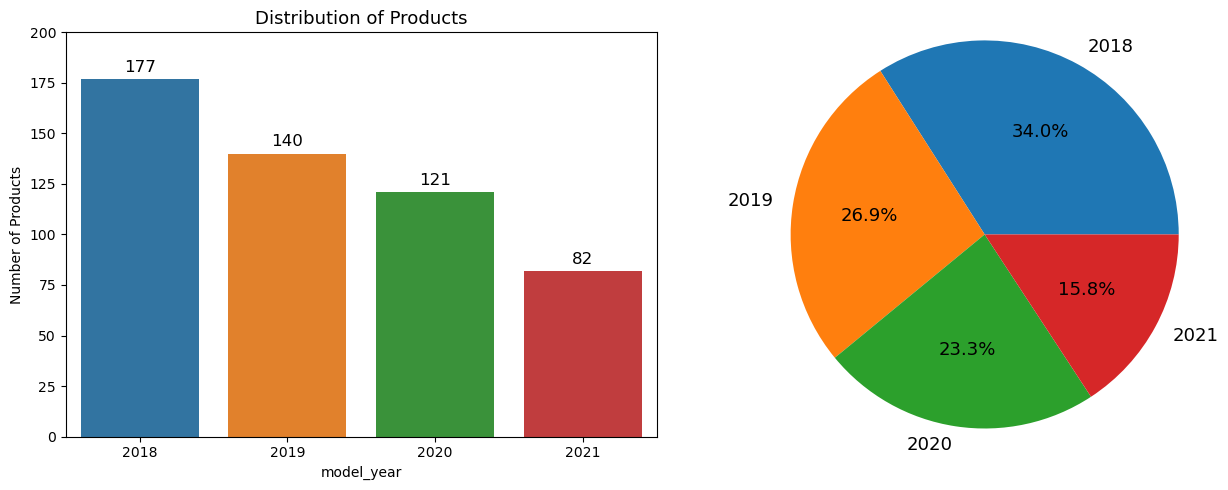

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,5))

x = df_prod['model_year'].value_counts().index
y = df_prod['model_year'].value_counts().values

plt.subplot(121)
g = sns.countplot(data=df_prod, x='model_year')
plt.bar_label(g.containers[0], padding=3, size=12), plt.ylim(0, 200)

plt.xlabel('model_year'), plt.ylabel('Number of Products')
plt.title('Distribution of Products', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13})

plt.tight_layout();

In [157]:
query = """
        CREATE TABLE product_new1 (
            product_id int,
            product_name varchar(255),
            brand_id int,
            category_id int ,
            model_year int,
            list_price decimal(10,2)
        )
        """
execute_query(conn, query)

Query Succeessful!


In [158]:
df_prod.to_dict('records')

[{'product_id': 1,
  'product_name': 'DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 1710 1715 1730 1735 1750 1755 1955 3000 3005 A100 M30X M35X - Black',
  'brand_id': 23,
  'category_id': 4,
  'model_year': 2021,
  'list_price': 23.99},
 {'product_id': 2,
  'product_name': 'NS-SP1800BL 5.1-Channel Home Theater System (Black)',
  'brand_id': 5,
  'category_id': 5,
  'model_year': 2021,
  'list_price': 136.99},
 {'product_id': 3,
  'product_name': 'Acoustimass 6 Series V Home Theater Speaker System (Black)',
  'brand_id': 24,
  'category_id': 5,
  'model_year': 2021,
  'list_price': 599.0},
 {'product_id': 4,
  'product_name': 'Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3000MHz C15 Desktop Memory Kit - Black (CMK16GX4M2B3000C15)',
  'brand_id': 6,
  'category_id': 4,
  'model_year': 2021,
  'list_price': 151.99},
 {'product_id': 5,
  'product_name': 'Details About Samsung Gear Iconx 2018 Edition Cordfree Fitness Earbuds Black (us Version)',
  'brand_id': 1,
  'category_id': 14,
  'mod

In [159]:
records = df_prod.to_dict('records')

In [160]:
for k,v in enumerate(records, start=1):
    print(k,v)

1 {'product_id': 1, 'product_name': 'DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 1710 1715 1730 1735 1750 1755 1955 3000 3005 A100 M30X M35X - Black', 'brand_id': 23, 'category_id': 4, 'model_year': 2021, 'list_price': 23.99}
2 {'product_id': 2, 'product_name': 'NS-SP1800BL 5.1-Channel Home Theater System (Black)', 'brand_id': 5, 'category_id': 5, 'model_year': 2021, 'list_price': 136.99}
3 {'product_id': 3, 'product_name': 'Acoustimass 6 Series V Home Theater Speaker System (Black)', 'brand_id': 24, 'category_id': 5, 'model_year': 2021, 'list_price': 599.0}
4 {'product_id': 4, 'product_name': 'Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3000MHz C15 Desktop Memory Kit - Black (CMK16GX4M2B3000C15)', 'brand_id': 6, 'category_id': 4, 'model_year': 2021, 'list_price': 151.99}
5 {'product_id': 5, 'product_name': 'Details About Samsung Gear Iconx 2018 Edition Cordfree Fitness Earbuds Black (us Version)', 'brand_id': 1, 'category_id': 14, 'model_year': 2021, 'list_price': 199.99}
6 {'produ

In [161]:
for k,v in enumerate(records):
    print(v['product_name'])

DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 1710 1715 1730 1735 1750 1755 1955 3000 3005 A100 M30X M35X - Black
NS-SP1800BL 5.1-Channel Home Theater System (Black)
Acoustimass 6 Series V Home Theater Speaker System (Black)
Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3000MHz C15 Desktop Memory Kit - Black (CMK16GX4M2B3000C15)
Details About Samsung Gear Iconx 2018 Edition Cordfree Fitness Earbuds Black (us Version)
2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD
Details About Alpine 480w 6.5 2way Typee Coaxial Car Speakers W/ Silk Tweeters | Spe6000"
Kenwood KFC-1653MRW 6.5 2-way Marine Speakers Pair (White)"
Microsoft Surface Pro 4 Type Cover with Fingerprint ID
CORSAIR VENGEANCE RGB 16GB (2x8GB) DDR4 3200MHz C16 Desktop Memory - Black
DENAQ - AC Power Adapter and Charger for Select HP Omnibook, Pavilion and Presario Laptops - Black
Samsung - 50 Class (49.5" Diag.) - LED - 1080p - Smart - HDTV"
Polk Audio - 50 W Woofer - Black
Apple - Pre-Owned iPad 3 - 64GB - Black
Corsair CMSA8GX3M2

In [162]:
sql = 'INSERT product_new1 VALUES(?,?,?,?,?,?)'
for k,v in enumerate(records):
    crs.execute(sql, (v['product_id'], v['product_name'], v['brand_id'], v['category_id'], 
                      v['model_year'], v['list_price']))

In [163]:
crs.execute("SELECT * FROM product_new1").fetchall()

[(1, 'DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 1710 1715 1730 1735 1750 1755 1955 3000 3005 A100 M30X M35X - Black', 23, 4, 2021, Decimal('23.99')),
 (2, 'NS-SP1800BL 5.1-Channel Home Theater System (Black)', 5, 5, 2021, Decimal('136.99')),
 (3, 'Acoustimass 6 Series V Home Theater Speaker System (Black)', 24, 5, 2021, Decimal('599.00')),
 (4, 'Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3000MHz C15 Desktop Memory Kit - Black (CMK16GX4M2B3000C15)', 6, 4, 2021, Decimal('151.99')),
 (5, 'Details About Samsung Gear Iconx 2018 Edition Cordfree Fitness Earbuds Black (us Version)', 1, 14, 2021, Decimal('199.99')),
 (6, '2TB Red 5400 rpm SATA III 3.5 Internal NAS HDD', 12, 4, 2021, Decimal('89.95')),
 (7, 'Details About Alpine 480w 6.5 2way Typee Coaxial Car Speakers W/ Silk Tweeters | Spe6000"', 35, 5, 2021, Decimal('59.99')),
 (8, 'Kenwood KFC-1653MRW 6.5 2-way Marine Speakers Pair (White)"', 31, 5, 2021, Decimal('99.99')),
 (9, 'Microsoft Surface Pro 4 Type Cover with Fingerprint ID'

In [164]:
conn.close()